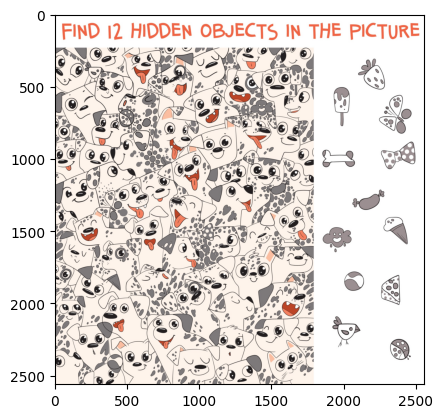

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Đọc ảnh đầu vào
image_path = "C:\\Users\\Hoanggg\\Downloads\\Midterm-ImageSet\\Finding\\2.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [2]:
# Lấy kích thước ảnh
image.shape
height, width, _ = image.shape

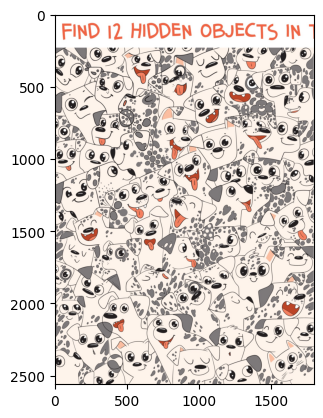

In [14]:
# Chia ảnh thành 2 phần: ảnh chính (bên trái) và ảnh mẫu (bên phải)
split_ratio = 0.70
split_point = int(width * split_ratio)

image_main = image[:, :split_point]
image_template = image[:, split_point:]
plt.imshow(image_main)


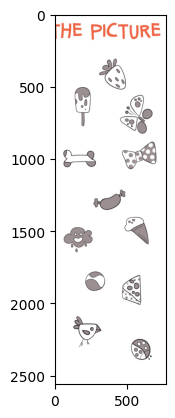

In [15]:
plt.imshow(image_template)

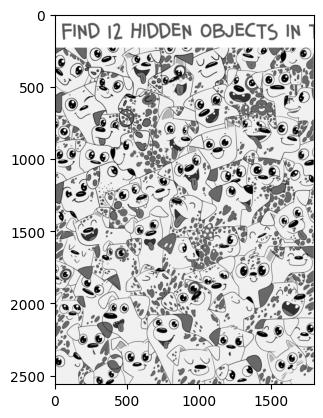

In [16]:
main_gray = cv2.cvtColor(image_main, cv2.COLOR_BGR2GRAY)
main_blurred = cv2.GaussianBlur(main_gray, (5, 5), 0)
plt.imshow(main_blurred, cmap = 'gray')

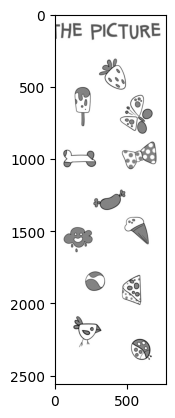

In [17]:
template_gray = cv2.cvtColor(image_template, cv2.COLOR_BGR2GRAY)
template_blurred = cv2.GaussianBlur(template_gray, (5, 5), 0)
plt.imshow(template_blurred, cmap = 'gray')

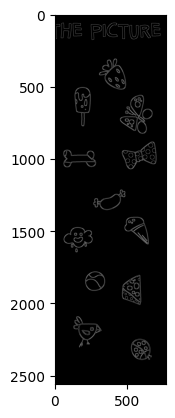

In [18]:
main_edges = cv2.Canny(main_blurred, 100, 200)
plt.imshow(main_edges, cmap = 'gray')
template_edges = cv2.Canny(template_blurred, 100, 200)
plt.imshow(template_edges, cmap = 'gray')

In [19]:
# Lưu 2 ảnh kết quả
main_path = "main_image.jpg"
template_path = "template_image.jpg"

cv2.imwrite(main_path, image_main)
cv2.imwrite(template_path, image_template)

main_path, template_path

('main_image.jpg', 'template_image.jpg')

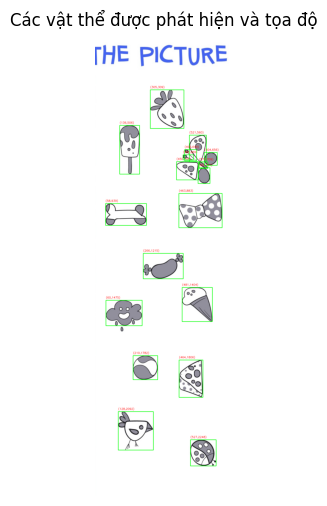

Tọa độ các vật thể (x, y, w, h):
(527, 2248, 142, 145)
(128, 2092, 194, 213)
(464, 1806, 132, 207)
(210, 1782, 136, 133)
(60, 1475, 200, 141)
(481, 1404, 167, 189)
(266, 1215, 221, 141)
(58, 939, 226, 121)
(463, 883, 239, 190)
(569, 741, 66, 87)
(575, 709, 48, 35)
(450, 707, 121, 101)
(486, 669, 57, 28)
(604, 656, 71, 71)
(495, 640, 66, 62)
(521, 560, 94, 148)
(136, 506, 110, 270)
(305, 309, 186, 214)


In [54]:
# Đọc ảnh
image_path = "template_image.jpg"
image = cv2.imread(image_path)
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng threshold để tách nền trắng
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Tìm contours của các vật thể
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Thiết lập ngưỡng y để loại bỏ tiêu đề "THE PICTURE"
TITLE_Y_THRESHOLD = 100  # Giả định tiêu đề nằm ở trên cùng, có thể điều chỉnh nếu cần

object_coords = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # Bỏ qua tiêu đề bằng cách lọc theo vị trí y
    if y > TITLE_Y_THRESHOLD and w > 20 and h > 20:
        object_coords.append((x, y, w, h))
        # Vẽ hình chữ nhật quanh vật thể
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Hiển thị tọa độ
        cv2.putText(output, f"({x},{y})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 0, 255), 1, cv2.LINE_AA)

# Hiển thị ảnh với bounding box và tọa độ
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Các vật thể được phát hiện và tọa độ")
plt.axis("off")
plt.show()

# In ra tọa độ của các vật thể
print("Tọa độ các vật thể (x, y, w, h):")
for coord in object_coords:
    print(coord)

In [ ]:
import os

# Đường dẫn đến ảnh chính
image_path = "template_image.jpg"
image = cv2.imread(image_path)

# Danh sách tọa độ của các vật thể theo định dạng (x, y, w, h)
coords = [
    (527, 2248, 142, 145),
    (128, 2092, 194, 213),
    (464, 1806, 132, 207),
    (210, 1782, 136, 133),
    (60, 1475, 200, 141),
    (481, 1404, 167, 189),
    (266, 1215, 221, 141),
    (58, 939, 226, 121),
    (463, 883, 239, 190),
    (569, 741, 66, 87),
    (575, 709, 48, 35),
    (450, 707, 121, 101),
    (486, 669, 57, 28),
    (604, 656, 71, 71),
    (495, 640, 66, 62),
    (521, 560, 94, 148),
    (136, 506, 110, 270),
    (305, 309, 186, 214)
]

# Tạo thư mục lưu ảnh cắt (nếu chưa có)
output_dir = "extracted_objects"
os.makedirs(output_dir, exist_ok=True)

# Duyệt qua danh sách tọa độ để cắt từng vật thể
for idx, (x, y, w, h) in enumerate(coords):
    # Cắt vùng ảnh từ tọa độ (x, y) với kích thước (w, h)
    cropped = image[y:y+h, x:x+w]

    # Chuyển đổi ảnh cắt ra thành ảnh xám
    cropped_gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

    # Lưu ảnh đã cắt ra file riêng
    filename = os.path.join(output_dir, f"object_{idx+1}.png")
    cv2.imwrite(filename, cropped_gray)
    print(f"Lưu {filename} với tọa độ: (x={x}, y={y}, w={w}, h={h})")


Lưu extracted_objects\object_1.png với tọa độ: (x=527, y=2248, w=142, h=145)
Lưu extracted_objects\object_2.png với tọa độ: (x=128, y=2092, w=194, h=213)
Lưu extracted_objects\object_3.png với tọa độ: (x=464, y=1806, w=132, h=207)
Lưu extracted_objects\object_4.png với tọa độ: (x=210, y=1782, w=136, h=133)
Lưu extracted_objects\object_5.png với tọa độ: (x=60, y=1475, w=200, h=141)
Lưu extracted_objects\object_6.png với tọa độ: (x=481, y=1404, w=167, h=189)
Lưu extracted_objects\object_7.png với tọa độ: (x=266, y=1215, w=221, h=141)
Lưu extracted_objects\object_8.png với tọa độ: (x=58, y=939, w=226, h=121)
Lưu extracted_objects\object_9.png với tọa độ: (x=463, y=883, w=239, h=190)
Lưu extracted_objects\object_10.png với tọa độ: (x=569, y=741, w=66, h=87)
Lưu extracted_objects\object_11.png với tọa độ: (x=575, y=709, w=48, h=35)
Lưu extracted_objects\object_12.png với tọa độ: (x=450, y=707, w=121, h=101)
Lưu extracted_objects\object_13.png với tọa độ: (x=486, y=669, w=57, h=28)
Lưu extra

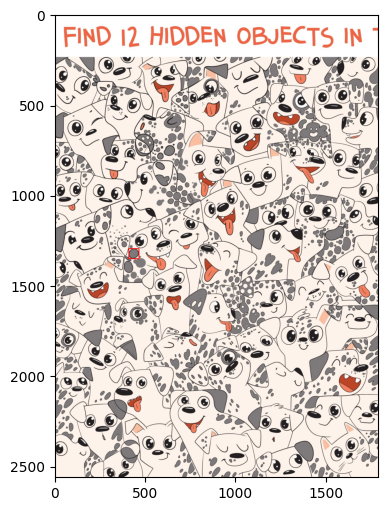

In [59]:
def template_matching(image_edges, template_edges):
    """
    Hàm thực hiện Template Matching với nhiều tỷ lệ khác nhau để tìm vị trí tốt nhất của mẫu trên ảnh chính.
    """
    scales = np.arange(0.4, 2.0, 0.05)  # Các tỷ lệ để thử nghiệm
    best_val = -1
    best_loc = None
    best_scale = None

    for scale in scales:
        # Resize template theo tỷ lệ hiện tại
        new_w = int(template_edges.shape[1] * scale)
        new_h = int(template_edges.shape[0] * scale)

        if new_w <= 0 or new_h <= 0:
            continue  # Bỏ qua nếu kích thước resize không hợp lệ

        resized_template = cv2.resize(template_edges, (new_w, new_h))

        # So khớp template
        result = cv2.matchTemplate(image_edges, resized_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        # Lưu kết quả tốt nhất
        if max_val > best_val:
            best_val = max_val
            best_loc = max_loc
            best_scale = scale

    return best_loc, best_scale, best_val

# Đọc ảnh chính và chuyển sang ảnh xám
s_img = cv2.imread("main_image.jpg")
s_img_gray = cv2.cvtColor(s_img, cv2.COLOR_BGR2GRAY)

# Đọc ảnh mẫu và chuyển sang ảnh xám
t_img = cv2.imread("extracted_objects/object_14.png")
t_img_gray = cv2.cvtColor(t_img, cv2.COLOR_BGR2GRAY)

# Áp dụng Canny Edge Detection
main_edges = cv2.Canny(s_img_gray, 100, 200)
template_edges = cv2.Canny(t_img_gray, 100, 200)

# Tìm vị trí tốt nhất
best_loc, best_scale, best_val = template_matching(main_edges, template_edges)

# Vẽ hình chữ nhật lên ảnh chính nếu tìm thấy
if best_loc:
    h, w = int(t_img.shape[0] * best_scale), int(t_img.shape[1] * best_scale)
    top_left = best_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(s_img, top_left, bottom_right, (255, 0, 0), 4)

# Hiển thị kết quả
plt.figure(figsize=(6, 6))
plt.imshow(s_img)
plt.show()
